In [127]:
import numpy as np
import pandas as pd

In [128]:
df = pd.read_csv('athlete_events.csv')
region_df = pd.read_csv('noc_regions.csv')

In [129]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [130]:
df.shape

(271116, 15)

In [131]:
df = df[df['Season'] == 'Summer']

In [132]:
df.shape

(222552, 15)

In [133]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN


In [134]:
region_df.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [135]:
df = df.merge(region_df, on='NOC')

In [136]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN


In [137]:
df['region'].unique()

array(['China', 'Denmark', 'Netherlands', 'Finland', 'Norway', 'Romania',
       'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran',
       'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia',
       'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey',
       'Chile', 'Mexico', 'USA', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan', 'Japan',
       'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco', 'Israel',
       'Uruguay', 'Sweden', 'Sri Lanka', 'Armenia', 'Ivory Coast',
       'Kenya', 'Benin', 

In [138]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9177
Height     51769
Weight     53764
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188124
region        21
notes     217802
dtype: int64

In [139]:
df.duplicated().sum()

1385

In [140]:
df.drop_duplicates(inplace=True)

In [141]:
df['Medal'].value_counts()

Medal
Gold      11455
Bronze    11405
Silver    11208
Name: count, dtype: int64

In [142]:
# one-hot encoding.
df = pd.concat([df, pd.get_dummies(df['Medal']).astype(int)], axis=1)

In [143]:
df.groupby('NOC').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()
# incorrect number of medals.


,NOC,Gold,Silver,Bronze
0,USA,2472,1333,1197
1,URS,832,635,596
2,GBR,635,729,620
3,GER,592,538,649
4,ITA,518,474,454
...,...,...,...,...
224,MDA,0,3,5
225,MAW,0,0,0
226,MAS,0,11,5
227,COM,0,0,0


In [144]:
medal_tally = df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])

In [145]:
medal_tally.shape

(105397, 20)

In [146]:
medal_tally = medal_tally.groupby('region').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()
# still not totally correct count of medals.

In [147]:
medal_tally['Total'] = medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze']

In [148]:
medal_tally

,region,Gold,Silver,Bronze,Total
0,USA,1035,802,708,2545
1,Russia,592,498,487,1577
2,Germany,444,457,491,1392
3,UK,278,317,300,895
4,France,234,256,287,777
...,...,...,...,...,...
200,Lesotho,0,0,0,0
201,Albania,0,0,0,0
202,Libya,0,0,0,0
203,Liechtenstein,0,0,0,0


In [149]:
years = df['Year'].unique().tolist()

In [150]:
years.sort()

In [151]:
years.insert(0, 'Overall')

In [152]:
years

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [153]:
country = np.unique(df['region'].dropna().values).tolist()

In [154]:
country.sort()

In [155]:
country.insert(0, 'Country')

In [156]:
country

['Country',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

In [157]:
def fetch_medal_tally(df, year, country):
    medal_df = df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])
    
    flag = 0
    if year=='Overall' and country=='Overall':
        temp_df = medal_df
    if year=='Overall' and country!='Overall':
        flag = 1
        temp_df = medal_df[medal_df['region']==country]
    if year!='Overall' and country=='Overall':
        temp_df = medal_df[medal_df['Year']==int(year)]
    if year!='Overall' and country!='Overall':
        temp_df = medal_df[(medal_df['region']==country) & (medal_df['Year']==int(year))]

    if flag==1:
        x = temp_df.groupby('Year').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Year').reset_index()
    else:
        x = temp_df.groupby('region').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()

    
    x['Total'] = x['Gold'] + x['Silver'] + x['Bronze']

    print(x)

In [158]:
df['Year'].unique().shape[0]-1  # 1906 is not regarded as olympic.

28

In [159]:
df['City'].unique().shape

(23,)

In [160]:
df['Sport'].unique().shape

(52,)

In [161]:
df['Event'].unique().shape

(651,)

In [162]:
df['Name'].unique().shape

(115956,)

In [163]:
df['region'].unique().shape

(206,)

In [164]:
import plotly.express as px
import plotly.io as pio

In [165]:
nations_over_time = df.drop_duplicates(['Year', 'region'])['Year'].value_counts().reset_index().sort_values('Year')

In [166]:
nations_over_time.rename(columns={'Year':'Edition', 'count':'No. of Countries'}, inplace=True)

In [167]:
nations_over_time

,Edition,No. of Countries
28,1896,12
22,1900,31
27,1904,14
26,1906,20
25,1908,22
23,1912,29
24,1920,29
21,1924,45
20,1928,46
19,1932,47


In [168]:
pio.renderers.default = "browser"

In [169]:
fig = px.line(nations_over_time, x="Edition", y="No. of Countries")
fig.show()

In [170]:
events_over_time = df.drop_duplicates(['Year', 'Event'])['Year'].value_counts().reset_index().sort_values('Year')

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt

In [172]:
x = df.drop_duplicates(['Year', 'Sport', 'Event'])

<Axes: xlabel='Year', ylabel='Sport'>

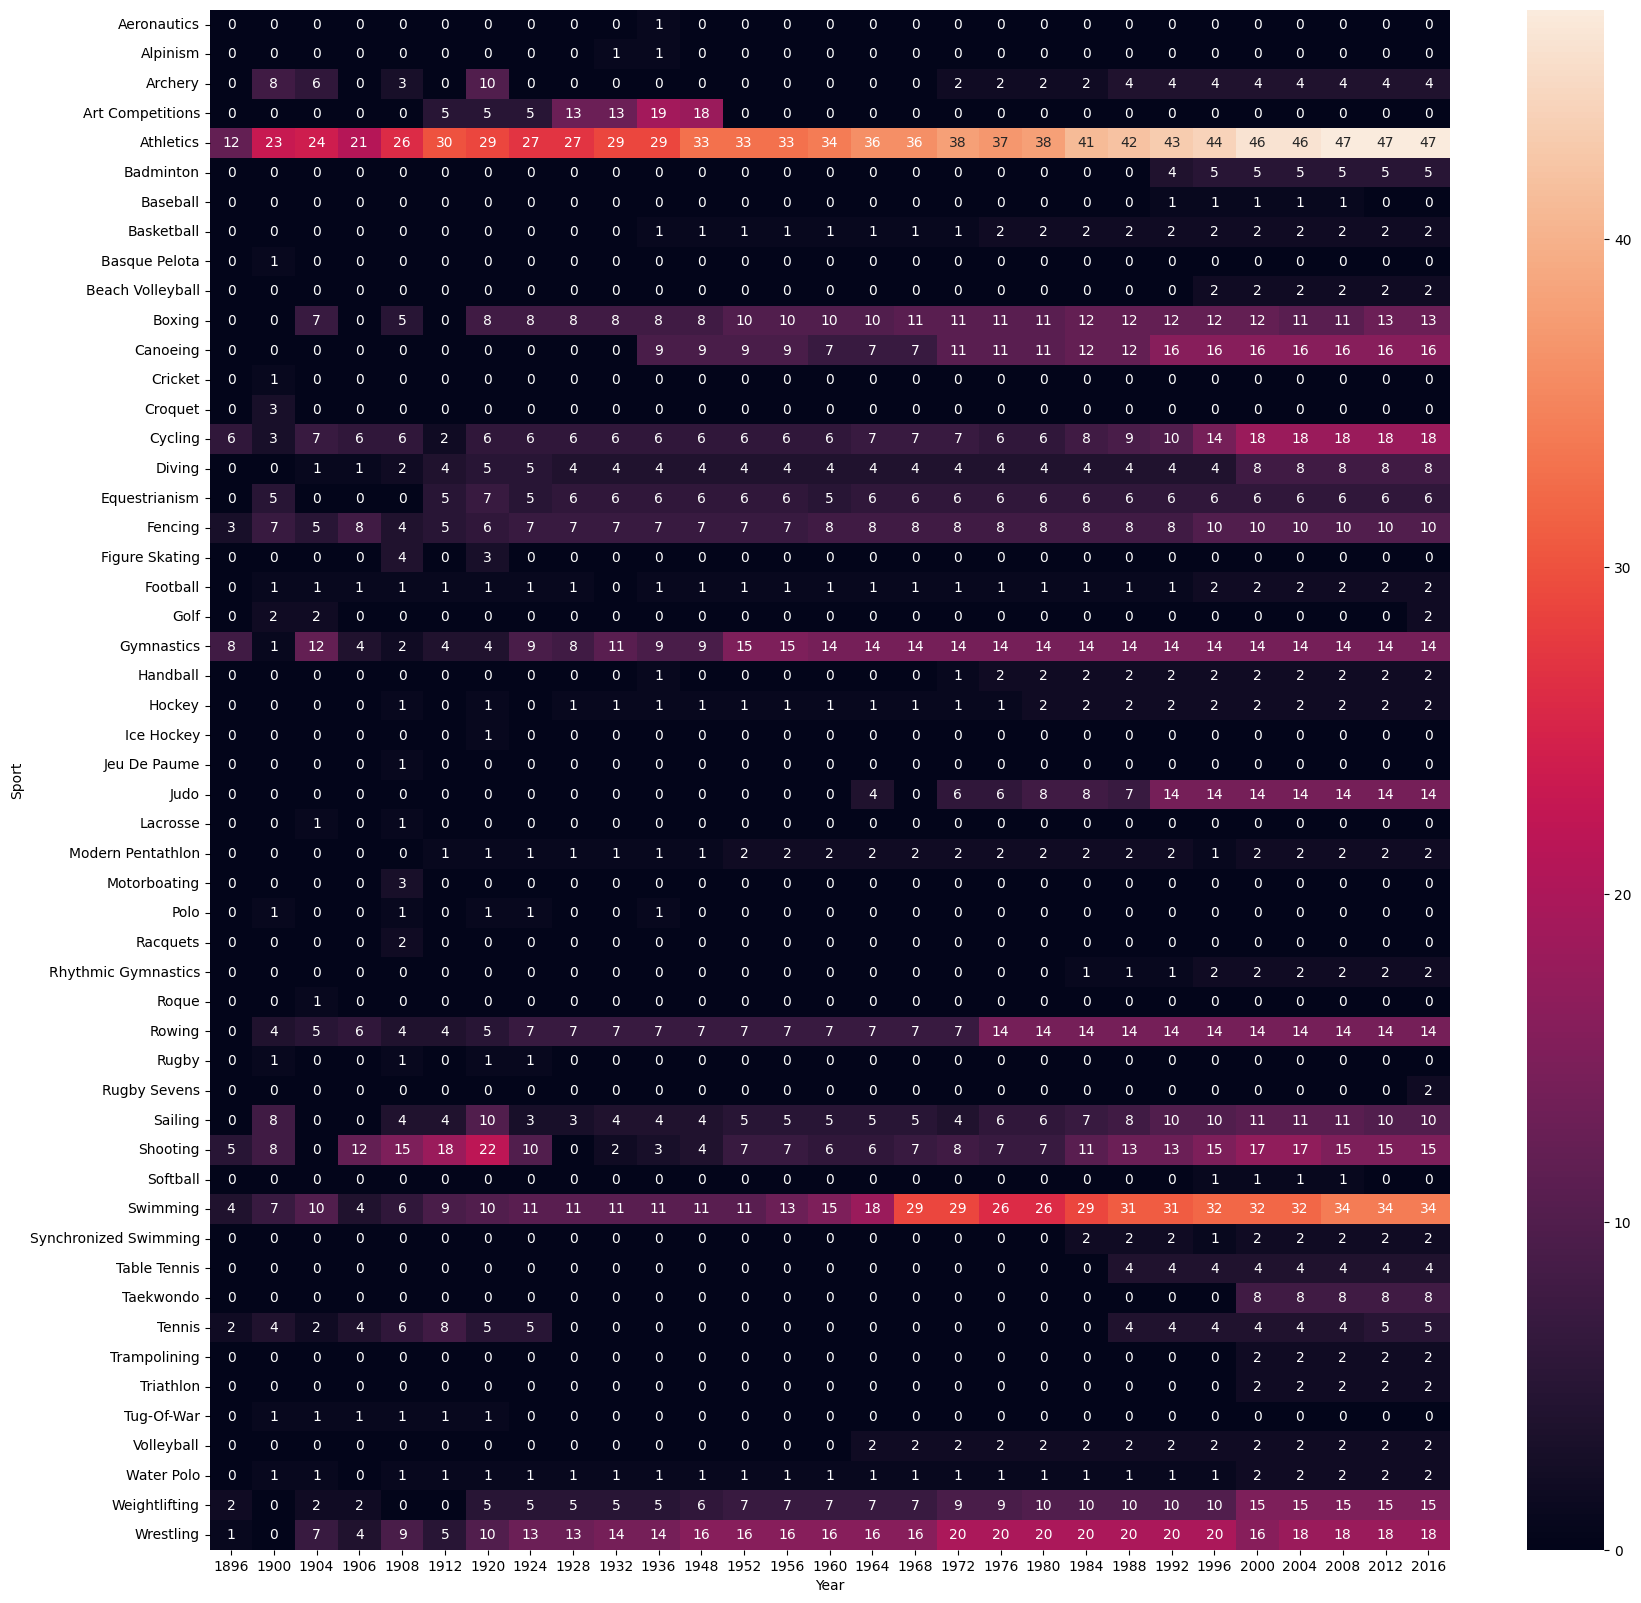

In [173]:
plt.figure(figsize=(20, 20))
sns.heatmap(x.pivot_table(index='Sport', columns='Year', values='Event', aggfunc='count').fillna(0).astype(int), annot=True)

In [174]:
def most_successful(df, sport):
    temp_df = df.dropna(subset=['Medal'])

    if sport != 'Overall':
        temp_df = temp_df[temp_df['Sport']==sport]

    x = temp_df['Name'].value_counts().reset_index().head(15).merge(df, left_on='Name', right_on='Name', how='left')[['Name', 'count', 'Sport', 'region']].drop_duplicates('Name')
    x.rename(columns={'count':'Medals'}, inplace=True)
    return x

In [175]:
most_successful(df, 'Gymnastics')

,Name,Medals,Sport,region
0,Larysa Semenivna Latynina (Diriy-),18,Gymnastics,Russia
19,Nikolay Yefimovich Andrianov,15,Gymnastics,Russia
43,Borys Anfiyanovych Shakhlin,13,Gymnastics,Russia
67,Takashi Ono,13,Gymnastics,Japan
100,Sawao Kato,12,Gymnastics,Japan
124,Aleksey Yuryevich Nemov,12,Gymnastics,Russia
145,Vra slavsk (-Odloilov),11,Gymnastics,Czech Republic
163,Viktor Ivanovych Chukarin,11,Gymnastics,Russia
179,Aleksandr Nikolayevich Dityatin,10,Gymnastics,Russia
195,Akinori Nakayama,10,Gymnastics,Japan


In [176]:
temp_df = df.dropna(subset=['Medal'])
temp_df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'], inplace=True)

C:\Users\ayush\AppData\Local\Temp\ipykernel_6172\4076372601.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [177]:
new_df = temp_df[temp_df['region']=='India']
final_df = new_df.groupby('Year').count()['Medal'].reset_index()

In [178]:
final_df

,Year,Medal
0,1900,2
1,1928,1
2,1932,1
3,1936,1
4,1948,1
5,1952,2
6,1956,1
7,1960,1
8,1964,1
9,1968,1


In [179]:
fig = px.line(final_df, x="Year", y="Medal")
fig.show()

<Axes: xlabel='Year', ylabel='Sport'>

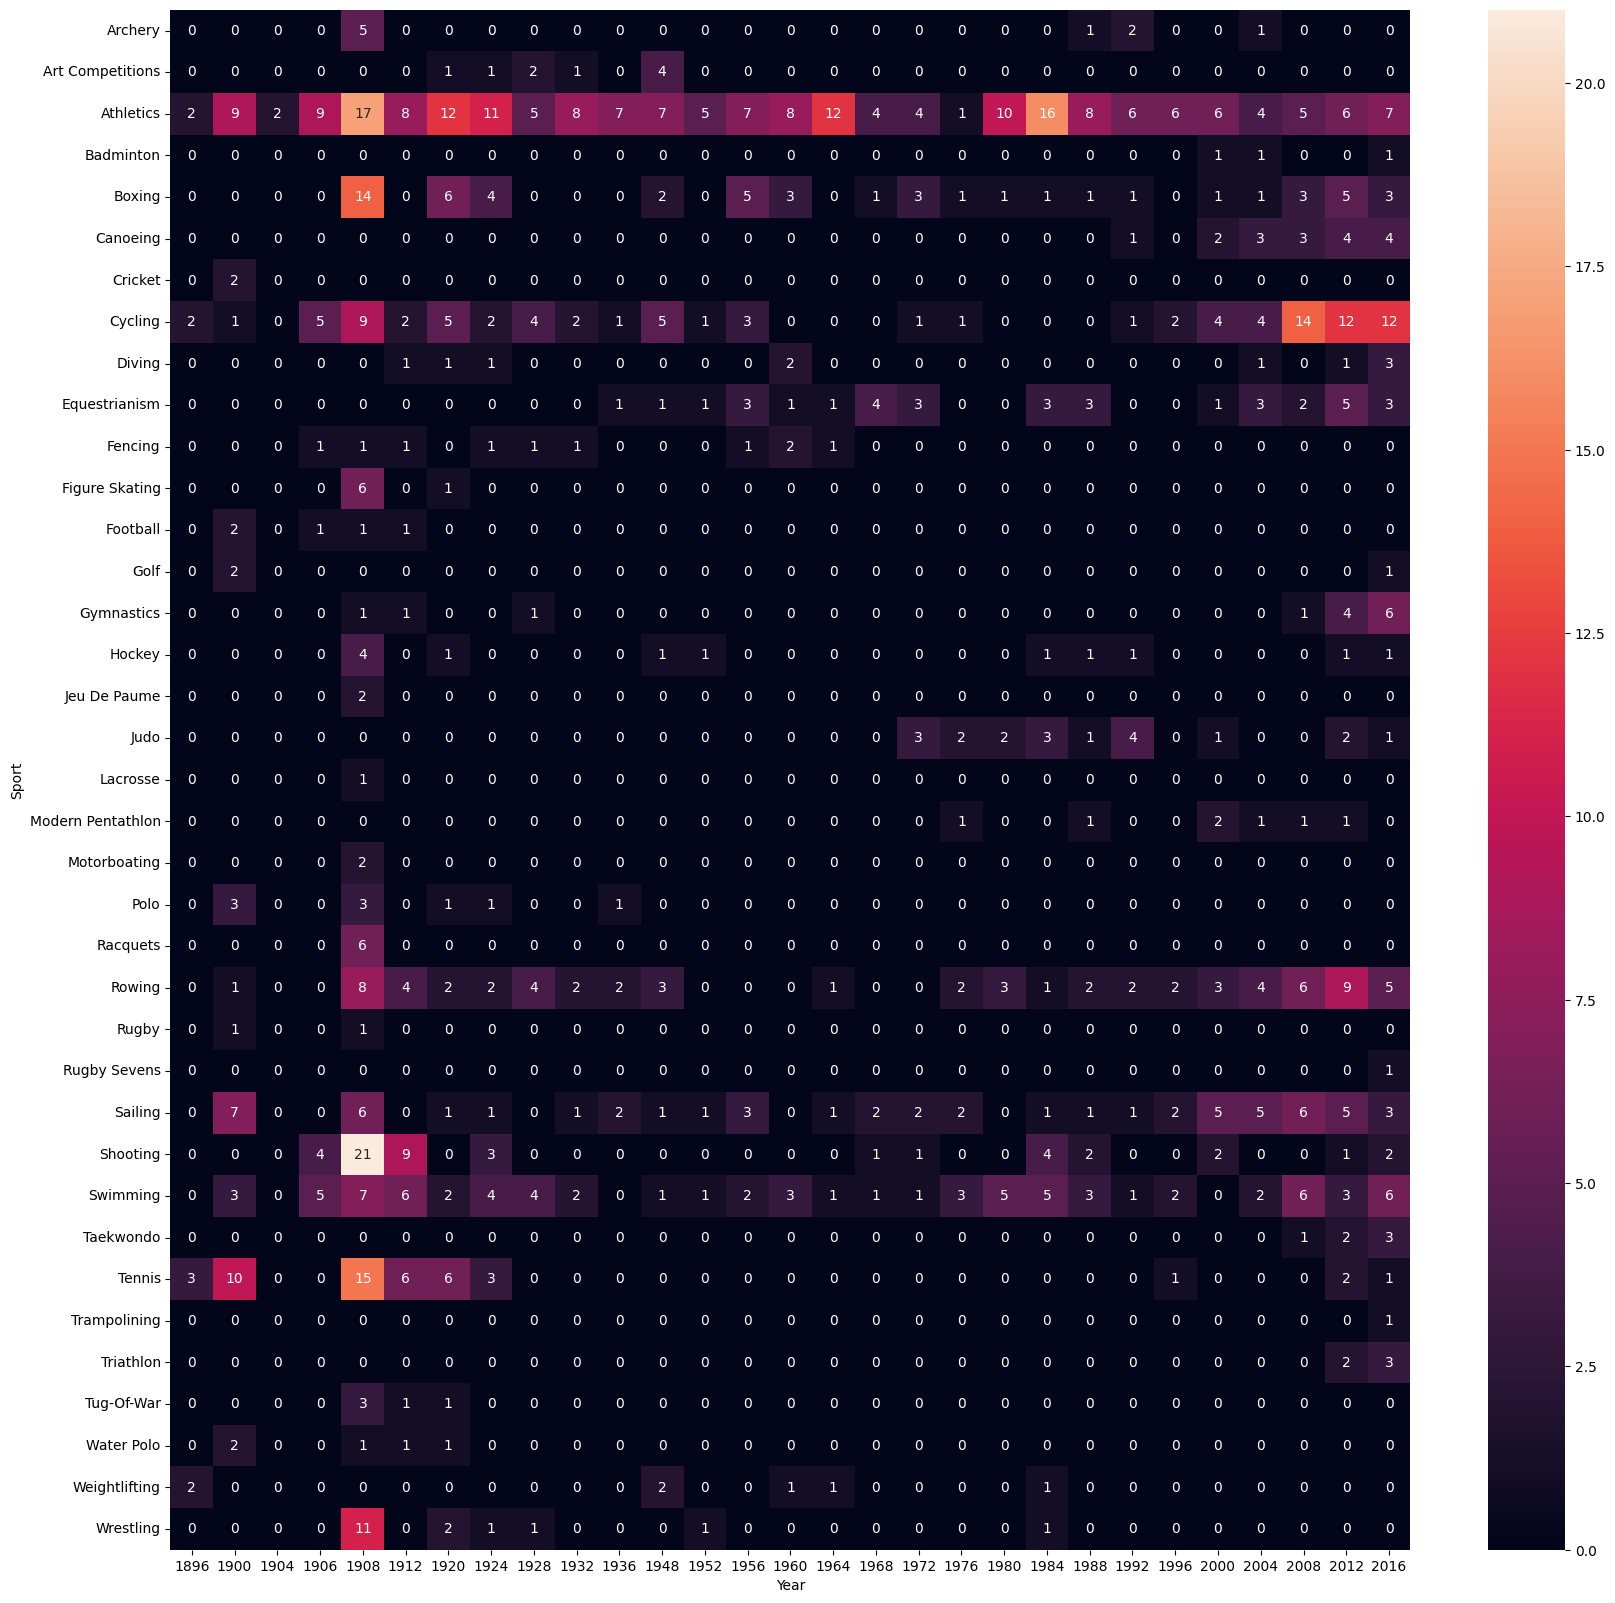

In [183]:
new_df = temp_df[temp_df['region']=='UK']
plt.figure(figsize=(20, 20))
sns.heatmap(new_df.pivot_table(index='Sport', columns='Year', values='Medal', aggfunc='count').fillna(0).astype(int), annot=True)

In [184]:
def most_successful(df, country):
    temp_df = df.dropna(subset=['Medal'])

    temp_df = temp_df[temp_df['region']==country]

    x = temp_df['Name'].value_counts().reset_index().head(15).merge(df, left_on='Name', right_on='Name', how='left')[['Name', 'count', 'Sport']].drop_duplicates('Name')
    x.rename(columns={'count':'Medals'}, inplace=True)
    return x

In [187]:
most_successful(df, 'Jamaica')

,Name,Medals,Sport
0,Merlene Joyce Ottey-Page,9,Athletics
19,Veronica Angella Campbell-Brown,8,Athletics
30,Usain St. Leo Bolt,8,Athletics
40,Shelly-Ann Fraser-Pryce,6,Athletics
47,"Donald O'Reilly ""Don"" Quarrie",4,Athletics
56,"Herbert Henry ""Herb"" McKenley",4,Athletics
62,Arthur Stanley Wint,4,Athletics
68,Novlene Hilaire Williams-Mills,4,Athletics
75,Yohan Blake,4,Athletics
81,Sherone Anmarica Simpson,3,Athletics


In [188]:
import plotly.figure_factory as ff

In [190]:
athlete_df = df.drop_duplicates(subset=['Name', 'region'])

In [199]:
x1 = athlete_df['Age'].dropna().astype(int)
x2 = athlete_df[athlete_df['Medal']=='Gold']['Age'].dropna().astype(int)
x3 = athlete_df[athlete_df['Medal']=='Silver']['Age'].dropna().astype(int)
x4 = athlete_df[athlete_df['Medal']=='Bronze']['Age'].dropna().astype(int)

In [200]:
fig = ff.create_distplot([x1, x2, x3, x4], ['Overall Age', 'Gold Medalist', 'Silver Medalist', 'Bronze Medalist'], show_hist=False, show_rug=False)
fig.show()

In [213]:
df['Sport'].unique()

array(['Basketball', 'Judo', 'Boxing', 'Wrestling', 'Swimming',
       'Softball', 'Hockey', 'Archery', 'Triathlon', 'Football',
       'Rhythmic Gymnastics', 'Athletics', 'Badminton', 'Fencing',
       'Gymnastics', 'Volleyball', 'Baseball', 'Water Polo', 'Shooting',
       'Weightlifting', 'Cycling', 'Rowing', 'Sailing', 'Diving',
       'Modern Pentathlon', 'Art Competitions', 'Synchronized Swimming',
       'Handball', 'Canoeing', 'Table Tennis', 'Tennis', 'Taekwondo',
       'Beach Volleyball', 'Trampolining', 'Golf', 'Equestrianism',
       'Tug-Of-War', 'Figure Skating', 'Rugby', 'Rugby Sevens', 'Cricket',
       'Croquet', 'Polo', 'Ice Hockey', 'Motorboating', 'Basque Pelota',
       'Roque', 'Lacrosse', 'Jeu De Paume', 'Alpinism', 'Aeronautics',
       'Racquets'], dtype=object)

In [214]:
athlete_df['Medal'].fillna('No Medal', inplace=True)

<Axes: xlabel='Weight', ylabel='Height'>

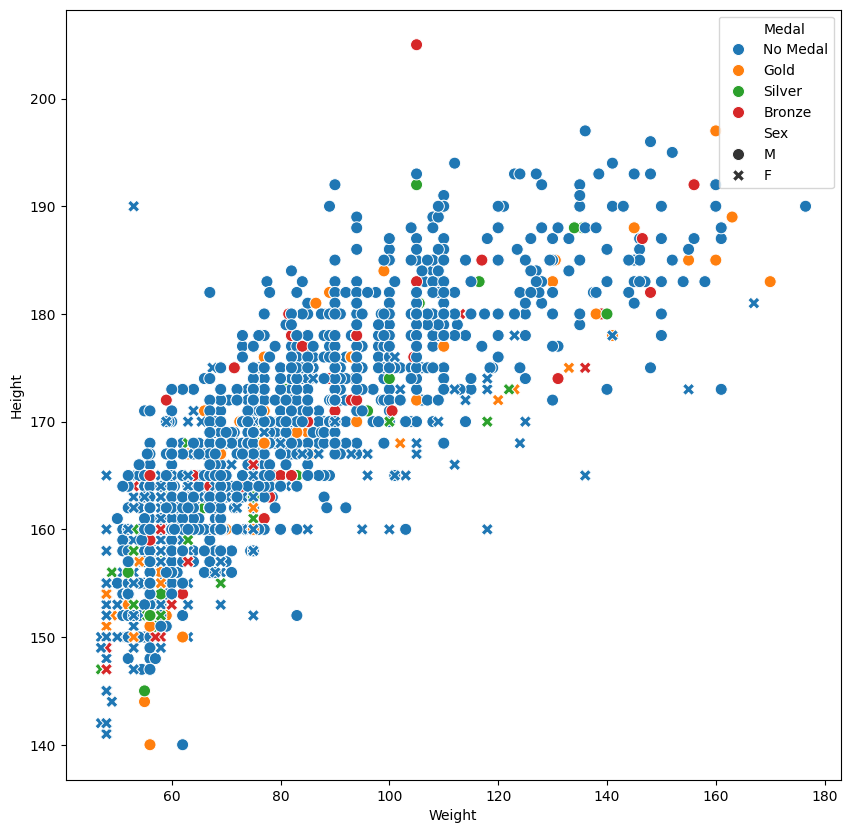

In [232]:
plt.figure(figsize=(10, 10))
temp_df = athlete_df[athlete_df['Sport']=='Weightlifting']
sns.scatterplot(x=temp_df['Weight'], y=temp_df['Height'], hue=temp_df['Medal'], style=temp_df['Sex'], s=75)

In [239]:
men = athlete_df[athlete_df['Sex']=='M'].groupby('Year').count()['Name'].reset_index()
women = athlete_df[athlete_df['Sex']=='F'].groupby('Year').count()['Name'].reset_index()

In [245]:
final = men.merge(women, on='Year')
final.rename(columns={'Name_x':'Male', 'Name_y':'Female'}, inplace=True)

In [249]:
final.fillna(0, inplace=True)

In [250]:
fig = px.line(final, x="Year", y=["Male", "Female"])
fig.show()